# Optimized occulter, based on trapeze functions basis.

In [1]:
import cupy as cp
from poly import *
from fresnel import *
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

/tmp/ipykernel_403167/2779582650.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


### Use free GPU ! Check device number with nvidia-smi

In [2]:
cp.cuda.Device(0).use()

<CUDA Device 0>

### Create trapeze petal occulter structure

In [4]:
n = 2000
print('Creating petal with %d points'%(n*2*24))
p = petal_FT(n_petals=24, n_border=n,profile_type='linearly_interpolated',profile_path='Matlab_files/Nouveau.mat')


Creating petal with 96000 points


### Visualize radial transmission profile

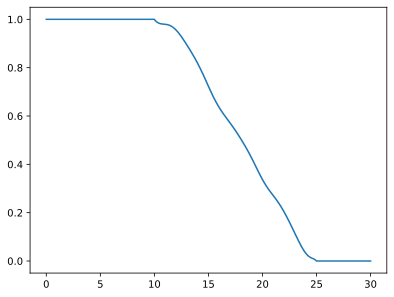

In [5]:
r=np.linspace(0,30,10001)
plt.plot(r,p.profile(r))

### Create diffraction structure. Compute Fresnel quadratic phase filter

In [6]:
m = 2**13
diff = diffraction(p,m)
diff.compute_fresnel_filter()

### Compute Fourier transform of polygonal approximation of petal occulter boundary

In [ ]:
diff.compute_polygonal_fmask()

### Compute diffraction pattern by convolution using Fourier grid 

In [ ]:
diff.compute_diffraction_patterns()

### Visualize mask Fourier transform

In [ ]:
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
fmask = diff.polygonal_fmask
nzoom = 1000
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
im0=ax.imshow(np.abs(fmask.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom]),norm=colors.LogNorm(vmax=500,vmin=1e-2))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

### Visualize petal occulter

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6.8,6.8))
ax.scatter(diff.petal.Gamma[:,0],diff.petal.Gamma[:,1],s=1)
ax.set_title('Trapeze optimized occulter with %d petals'%diff.petal.n_petals, fontsize=10)

### Visualize diffracted intensity profile at telescope aperture

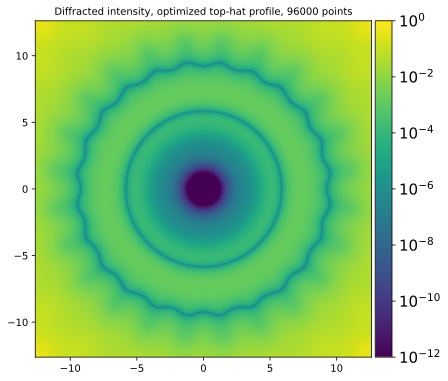

In [8]:
diffracted = np.load('/scratch/prunet/polyFT/approx/diffraction_n24_m8192_nouveau.npy').squeeze()
# diffracted = diff.diffracted
nzoom = 512
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
p.set_the_scene()
L = p.L * nzoom/4096
ext = [-L,L,-L,L]
im0=ax.imshow(np.abs(diffracted.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom])**2,
              norm=colors.LogNorm(vmax=1,vmin=1e-12), extent=ext)
ax.set_title('Diffracted intensity, optimized top-hat profile, %d points'%(p.n_border*48), fontsize=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

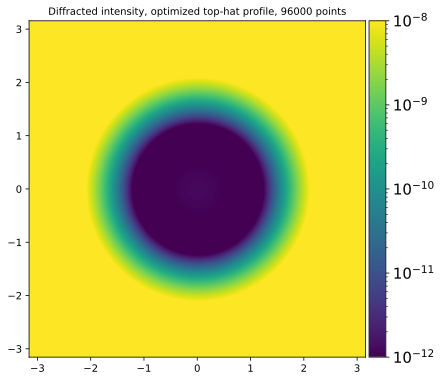

In [9]:
diffracted = np.load('/scratch/prunet/polyFT/approx/diffraction_n24_m8192_nouveau.npy').squeeze()
# diffracted = diff.diffracted
nzoom = 128
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
p.set_the_scene()
L = p.L * nzoom/4096
ext = [-L,L,-L,L]
im0=ax.imshow(np.abs(diffracted.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom])**2,
              norm=colors.LogNorm(vmax=1e-8,vmin=1e-12), extent=ext)
ax.set_title('Diffracted intensity, optimized top-hat profile, %d points'%(p.n_border*48), fontsize=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)